# Controlando el patron de lineas y el grosor de linea

El parametro linestyle esta en todas las funciones que tienen renderizacion de linea

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 8
A = np.random.random(N)
B = np.random.random(N)
X = np.arange(N)
plt.barh(X, A, color = '.3')
plt.barh(X, -B, color = '0.85', ls = ':',edgecolor='r')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
#? plt.bar

# Ancho de linea

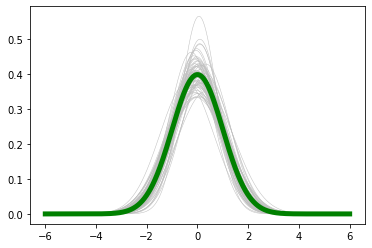

In [3]:
def pdf(X, mu, sigma):
    a = 1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma ** 2)
    return a * np.exp(b * (X - mu) ** 2)
X = np.linspace(-6, 6, 1024)
for i in range(64):
    muestras = np.random.standard_normal(50)
    mu, sigma = np.mean(muestras), np.std(muestras)
    plt.plot(X, pdf(X, mu, sigma), color = '.75', linewidth = .5)
plt.plot(X, pdf(X, 0., 1.), color = 'g', linewidth = 5.)
plt.show()

# Patrones de relleno

* rellenar las graficas con patrones

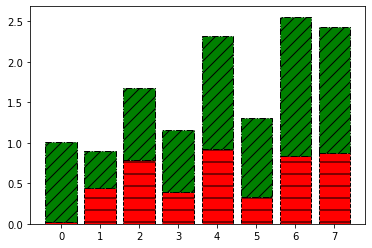

In [4]:
N = 8
A = np.random.random(N)
B = np.random.random(N)
X = np.arange(N)
plt.bar(X, A, color = 'r', \
        hatch = '-', ls = '--',\
        edgecolor='k')
plt.bar(X, A + B, bottom = A,\
        color = 'g', hatch = '//',\
        ls = '-.',edgecolor='k')
plt.show()
# hatch: {'/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}
#linestyle o ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}

In [5]:
?plt.bar

# Marcadores

* Marcadores predefinidos : estan predefinidas formas y representadas en rangos [0, 8] 

* Listas de vertices: valores en pares para coordenadas de una forma
* Poligono regular: representa una tripleta (N, 0, angulo) N poligono de lados regulares
* poligono estrella: tripleta (N, 1, angulo) N para una estrella de lados regulares 

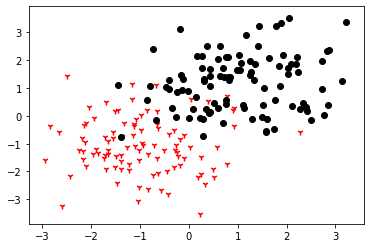

In [23]:
A = np.random.standard_normal((100, 2))
A += np.array((-1, -1))
B = np.random.standard_normal((100, 2))
B += np.array((1, 1))
plt.scatter(A[:,0], A[:,1], color = 'r', marker = '1')
plt.scatter(B[:,0], B[:,1], color = 'k', marker = 'o')
plt.show()
#markers = ('o', 'v', '^', '<', '>', '8', 's',
#'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')


In [7]:
?plt.scatter

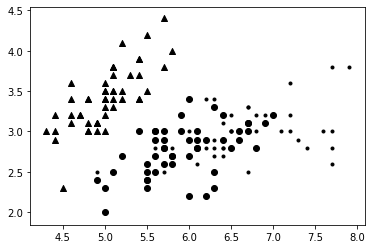

In [8]:
label_list = (
    b'Iris-setosa',
    b'Iris-versicolor',
    b'Iris-virginica',
)
def leer_el_label(label):
    return label_list.index(label)
data = np.loadtxt('iris.data',\
                  delimiter = ',',\
                  converters = { 4 : leer_el_label })
set_de_marcadores = ('^', 'o', '.')
for i, marcador in enumerate(set_de_marcadores):
    subset_de_data = np.asarray([x for x in data if x[4] == i])
    plt.scatter(subset_de_data[:,0], subset_de_data[:,1], color = 'k',\
    marker = marcador)
plt.show()

In [9]:
for i, marcador in enumerate(set_de_marcadores):
    print(marcador)

^
o
.


separamos puntos por etiqueta. Luego, iteramos a través de cada entrada del mapa y llame a pyplot.scatter () para cada subconjunto de puntos.

# El parametro markevery

* que pasa si no deseamos un solo tipo de marcador para todo nuestro puntos debido a que puede mostrar mas puntos de los cuales necesitamos

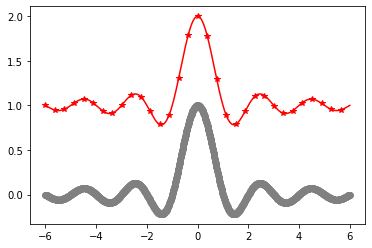

In [10]:
X = np.linspace(-6, 6, 1024)
Y1 = np.sinc(X) # tambien llamada"sampling function," 
Y2 = np.sinc(X) + 1 #sin(pi x)/(pi x)
plt.plot(X, Y1, marker = 'o', color = '.5')
plt.plot(X, Y2, marker = '*', color = 'r', markevery = 32)
# representa con el marcador cada 32 datos 
plt.show()

# El tamaño del marcador

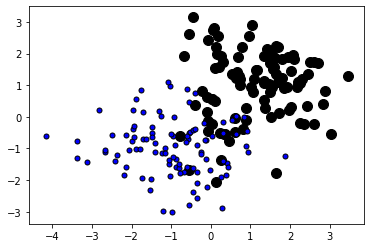

In [11]:
A = np.random.standard_normal((100, 2))
A += np.array((-1, -1))
B = np.random.standard_normal((100, 2))
B += np.array((1, 1))
plt.scatter(B[:,0], B[:,1], c = 'k', s = 100.)
plt.scatter(A[:,0], A[:,1], c = 'b', s = 25. ,edgecolor='k')
plt.show()

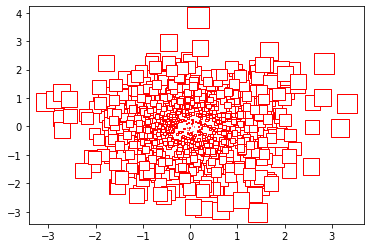

In [12]:
M = np.random.standard_normal((1000, 2))
R = np.sum(M ** 2, axis = 1)
plt.scatter(M[:, 0], M[:, 1], \
            c = 'w', marker = 's',\
            s = 32. * R,\
           edgecolor='r')
plt.show()

# creando tus propios marcadores

In [13]:
import matplotlib.path as mpath # este modulo toma objetos
#en instrucciones por cada coordenada
from matplotlib import pyplot as plt
import matplotlib.patches as patches
shape_description = [
( 1., 2., mpath.Path.MOVETO),
( 1., 1., mpath.Path.LINETO),
( 2., 1., mpath.Path.LINETO),
( 2., -1., mpath.Path.LINETO),
( 1., -1., mpath.Path.LINETO),
( 1., -2., mpath.Path.LINETO),
(-1., -2., mpath.Path.LINETO),
(-1., -1., mpath.Path.LINETO),
(-2., -1., mpath.Path.LINETO),
(-2., 1., mpath.Path.LINETO),
(-1., 1., mpath.Path.LINETO),
(-1., 2., mpath.Path.LINETO),
( 0., 0., mpath.Path.CLOSEPOLY),
]

In [14]:
type(shape_description)

list

In [15]:
np.asarray((u, v)).T

NameError: name 'u' is not defined

In [ ]:
u, v, codes = zip(*shape_description)

In [ ]:
fig, ax = plt.subplots()
my_marker = mpath.Path(np.asarray((u, v)).T, codes)
patch = patches.PathPatch(my_marker,facecolor='red', lw=6)
ax.add_patch(patch)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

In [ ]:
u, v, codes = zip(*shape_description)
my_marker = mpath.Path(np.asarray((u, v)).T, codes)
data = np.random.rand(10, 10)
plt.scatter(data[:,0], data[:, 1], c = 'r',\
            marker = my_marker, s = 64,
           edgecolor='k')
plt.show()

# Mas de MARCADORES

In [ ]:
X = np.linspace(-6, 6, 1024)
Y = np.sinc(X)
plt.plot(X, Y,
            linewidth = 3.,  #grosor de linea
            color = 'k',  # color
            markersize = 9, 
            markeredgewidth = 2.5, # el ancho del marcador
            markerfacecolor = '.85', # color del relleno del marcador
            markeredgecolor = 'g', # color del borde del marcador
            marker = 'o',   #tipo de marcador
            markevery = 32  # cada cuantos puntos se inserta este marcador
        )
plt.show()